## LSTM 신경망 훈련하기

In [2]:
from tensorflow.keras.datasets import imdb
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words = 500)
train_input, val_input, train_target, val_target = train_test_split(train_input,
    train_target, test_size = 0.2, random_state = 42)

#### padding으로 샘플 길이 100으로 맞추기

In [3]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
train_seq = pad_sequences(train_input, maxlen= 100)
val_seq = pad_sequences(val_input, maxlen = 100)

### LSTM 셀을 이용한 순환층

In [4]:
from tensorflow import keras
model = keras.Sequential()
model.add(keras.layers.Embedding(500, 16, input_length = 100))
model.add(keras.layers.LSTM(8)) #8개의 뉴런
model.add(keras.layers.Dense(1, activation = 'sigmoid'))

LSTM에는 작은 셀이 4개가 있으므로 정확히 SimpleRNN보다 4배가 늘어 파라미터 개수 800개

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 16)           8000      
_________________________________________________________________
lstm (LSTM)                  (None, 8)                 800       
_________________________________________________________________
dense (Dense)                (None, 1)                 9         
Total params: 8,809
Trainable params: 8,809
Non-trainable params: 0
_________________________________________________________________


In [6]:
rmsprop = keras.optimizers.RMSprop(learning_rate = 1e-4)

model.compile(optimizer = rmsprop, loss ='binary_crossentropy', metrics = ['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-lstm-model.h5')

early_stopping_cb = keras.callbacks.EarlyStopping(patience = 3, restore_best_weights = True)

history = model.fit(train_seq, train_target, epochs = 100, batch_size = 64,
                   validation_data = (val_seq, val_target),
                    callbacks = [checkpoint_cb, early_stopping_cb]
                   )

Epoch 1/100
313/313 [==============================] - 8s 19ms/step - loss: 0.6924 - accuracy: 0.5288 - val_loss: 0.6918 - val_accuracy: 0.5548
Epoch 2/100
313/313 [==============================] - 6s 18ms/step - loss: 0.6898 - accuracy: 0.5929 - val_loss: 0.6884 - val_accuracy: 0.6068
Epoch 3/100
313/313 [==============================] - 6s 18ms/step - loss: 0.6838 - accuracy: 0.6426 - val_loss: 0.6793 - val_accuracy: 0.6640
Epoch 4/100
313/313 [==============================] - 6s 18ms/step - loss: 0.6626 - accuracy: 0.6952 - val_loss: 0.6401 - val_accuracy: 0.7066
Epoch 5/100
313/313 [==============================] - 6s 18ms/step - loss: 0.6055 - accuracy: 0.7251 - val_loss: 0.5928 - val_accuracy: 0.7190
Epoch 6/100
313/313 [==============================] - 6s 18ms/step - loss: 0.5753 - accuracy: 0.7293 - val_loss: 0.5695 - val_accuracy: 0.7356
Epoch 7/100
313/313 [==============================] - 6s 18ms/step - loss: 0.5512 - accuracy: 0.7477 - val_loss: 0.5469 - val_accuracy:

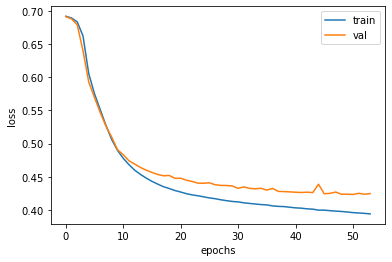

In [7]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

### 순환층에 드롭아웃 적용

순환층은 자체적으로 드롭아웃 기능을 제공 / simpleRNN과 LSTM 모두 dropout 매개변수와 recurrent_dropout 매개변수를 가짐

dropout 매개변수는 셀의 입력에 드롭아웃을 적용하고 recurrent_dropout은 순환되는 은닉 상태에 드롭아웃을 적용한다.

하지만 기술적인 문제로 recurrent_dropout을 사용하면 GPU를 사용하여 모델 훈련을 못함

따라서 dropout 만을 사용해 보겠음

In [9]:
model2 = keras.Sequential()
model2.add(keras.layers.Embedding(500,16,input_length =100))
model2.add(keras.layers.LSTM(8, dropout = 0.3))
model2.add(keras.layers.Dense(1, activation = 'sigmoid'))

In [10]:
rmsprop = keras.optimizers.RMSprop(learning_rate = 1e-4)

model2.compile(optimizer = rmsprop, loss ='binary_crossentropy', metrics = ['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-dropout-model.h5')

early_stopping_cb = keras.callbacks.EarlyStopping(patience = 3, restore_best_weights = True)

history = model2.fit(train_seq, train_target, epochs = 100, batch_size = 64,
                   validation_data = (val_seq, val_target),
                    callbacks = [checkpoint_cb, early_stopping_cb]
                   )

Epoch 1/100
313/313 [==============================] - 7s 19ms/step - loss: 0.6925 - accuracy: 0.5420 - val_loss: 0.6916 - val_accuracy: 0.5734
Epoch 2/100
313/313 [==============================] - 6s 19ms/step - loss: 0.6883 - accuracy: 0.6202 - val_loss: 0.6816 - val_accuracy: 0.6834
Epoch 3/100
313/313 [==============================] - 6s 19ms/step - loss: 0.6536 - accuracy: 0.6909 - val_loss: 0.6305 - val_accuracy: 0.6948
Epoch 4/100
313/313 [==============================] - 6s 19ms/step - loss: 0.6206 - accuracy: 0.6982 - val_loss: 0.6123 - val_accuracy: 0.7106
Epoch 5/100
313/313 [==============================] - 6s 18ms/step - loss: 0.6037 - accuracy: 0.7139 - val_loss: 0.5997 - val_accuracy: 0.7110
Epoch 6/100
313/313 [==============================] - 6s 19ms/step - loss: 0.5880 - accuracy: 0.7256 - val_loss: 0.5792 - val_accuracy: 0.7380
Epoch 7/100
313/313 [==============================] - 6s 19ms/step - loss: 0.5697 - accuracy: 0.7375 - val_loss: 0.5653 - val_accuracy:

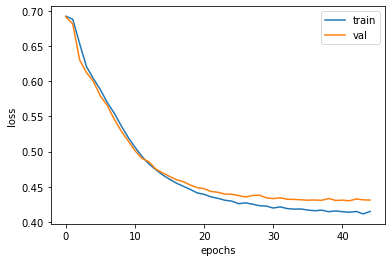

In [11]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

### 2개의 층 연결하기

순환층을 연결할 떄 한가의 주의점!! 순환층의 은닉 상태는 샘플의 마지막 타임스텝에 대한 은닉 상태만 다음 층으로 전달된다.

하지만 순환층을 쌓게 되면 모든 순환층에 순차 데이터가 필요

따라서 앞쪽의 순환층이 모든 타임스텝에 대한 은닉 상태를 출력해야함

케라스의 순환층에서 모든 타임스텝의 은닉상태를 출력하려면 마지막을 제외한 다른 모든 순환층에서 return_sequences 매개변수를 True로 지정하면 된다.

In [13]:
model3 = keras.Sequential()
model3.add(keras.layers.Embedding(500,16,input_length =100))
model3.add(keras.layers.LSTM(8, dropout = 0.3, return_sequences = True))
model3.add(keras.layers.LSTM(8, dropout = 0.3))
model3.add(keras.layers.Dense(1, activation = 'sigmoid'))

In [14]:
model3.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 100, 16)           8000      
_________________________________________________________________
lstm_2 (LSTM)                (None, 100, 8)            800       
_________________________________________________________________
lstm_3 (LSTM)                (None, 8)                 544       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 9,353
Trainable params: 9,353
Non-trainable params: 0
_________________________________________________________________


In [15]:
rmsprop = keras.optimizers.RMSprop(learning_rate = 1e-4)

model3.compile(optimizer = rmsprop, loss ='binary_crossentropy', metrics = ['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-2rnn-model.h5')

early_stopping_cb = keras.callbacks.EarlyStopping(patience = 3, restore_best_weights = True)

history = model3.fit(train_seq, train_target, epochs = 100, batch_size = 64,
                   validation_data = (val_seq, val_target),
                    callbacks = [checkpoint_cb, early_stopping_cb]
                   )

Epoch 1/100
313/313 [==============================] - 14s 38ms/step - loss: 0.6926 - accuracy: 0.5499 - val_loss: 0.6919 - val_accuracy: 0.5612
Epoch 2/100
313/313 [==============================] - 11s 36ms/step - loss: 0.6876 - accuracy: 0.6262 - val_loss: 0.6792 - val_accuracy: 0.6536
Epoch 3/100
313/313 [==============================] - 11s 36ms/step - loss: 0.6455 - accuracy: 0.6765 - val_loss: 0.6089 - val_accuracy: 0.6954
Epoch 4/100
313/313 [==============================] - 11s 35ms/step - loss: 0.5862 - accuracy: 0.7087 - val_loss: 0.5668 - val_accuracy: 0.7216
Epoch 5/100
313/313 [==============================] - 11s 35ms/step - loss: 0.5556 - accuracy: 0.7326 - val_loss: 0.5438 - val_accuracy: 0.7352
Epoch 6/100
313/313 [==============================] - 11s 36ms/step - loss: 0.5357 - accuracy: 0.7438 - val_loss: 0.5282 - val_accuracy: 0.7420
Epoch 7/100
313/313 [==============================] - 11s 35ms/step - loss: 0.5154 - accuracy: 0.7593 - val_loss: 0.5085 - val_ac

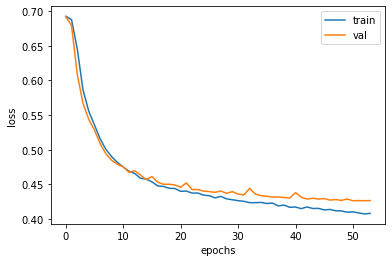

In [16]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()